# Aula 1 - Introduzindo o reconhecimento de áudio

## Vídeo 1.2 - Carregando os dados

In [7]:
gz_path = '/teamspace/studios/this_studio/dataset_commands.gz'

In [3]:
#!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 7.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 95.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 74.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 94.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 63.0 MB/s eta 0:00:00
  Att

In [8]:
import tensorflow as tf
import pathlib
import os
import gzip
import shutil
import numpy as np

In [9]:
def le_arquivos(gz_path):
    # Diretório onde os dados serão extraídos
    extracted_path = '/tmp/dataset_commands'
    # Extrair o arquivo .gz
    with gzip.open(gz_path, 'rb') as f_in:
        with open(extracted_path + '.tar', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

    # Extrair o arquivo .tar resultante
    shutil.unpack_archive(extracted_path + '.tar', extracted_path)

    # Caminho para os dados extraídos
    data_dir = pathlib.Path(extracted_path)

    # Listar todos os arquivos de áudio e suas labels
    all_audio_paths = list(data_dir.glob('*/**/*.wav'))
    all_labels = [path.parent.name for path in all_audio_paths]

    # Converter caminhos para strings
    all_audio_paths = [str(path) for path in all_audio_paths]

    return all_audio_paths, all_labels

In [10]:
all_audio_paths, all_labels = le_arquivos(gz_path)

In [11]:
np.unique(all_labels)

array(['_background_noise_', 'backward', 'bed', 'bird', 'cat', 'dog',
       'down', 'eight', 'five', 'follow', 'forward', 'four', 'go',
       'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off',
       'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three',
       'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero'], dtype='<U18')

In [12]:
np.unique(all_labels).shape

(36,)

In [13]:
import matplotlib.pyplot as plt

In [14]:
example_audio_path = all_audio_paths[0]

In [15]:
# Carregar o arquivo de áudio
audio_binary = tf.io.read_file(example_audio_path)
audio, _ = tf.audio.decode_wav(audio_binary)
audio = tf.squeeze(audio, axis=-1)

I0000 00:00:1723206607.635407    2460 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723206607.866953    2460 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723206607.867239    2460 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723206607.870964    2460 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

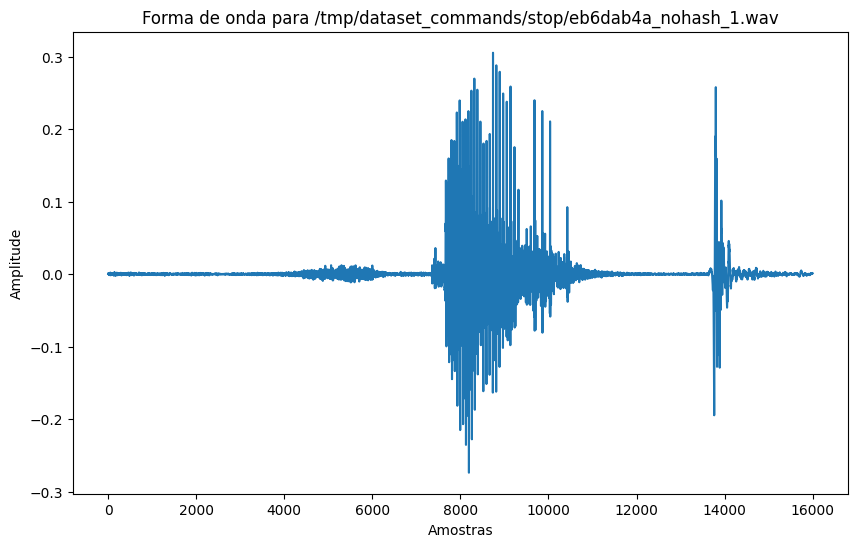

In [16]:
# Plotar a forma de onda
plt.figure(figsize=(10, 6))
plt.plot(audio.numpy())
plt.title(f'Forma de onda para {example_audio_path}')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()

## Vídeo 1.3 - Processando os dados de áudio

In [17]:
from scipy.signal import resample


In [18]:
# Função para carregar e processar o áudio com resampling usando SciPy
def load_and_process_audio(filename, max_length=16000):
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    
    # Função de resampling usando SciPy
    def scipy_resample(wav, sample_rate):
        if sample_rate != 16000:
            wav = resample(wav, int(16000 / sample_rate * len(wav)))
        return wav

    # Usar tf.py_function para envolver a operação de resampling
    wav = tf.py_function(scipy_resample, [wav, sample_rate], tf.float32)
    
    # Adicionar padding ou cortar os sinais de áudio
    audio_length = tf.shape(wav)[0]
    if audio_length > max_length:
        wav = wav[:max_length]
    else:
        pad_length = max_length - audio_length
        paddings = [[0, pad_length]]
        wav = tf.pad(wav, paddings, "CONSTANT")
    
    return tf.reshape(wav, [max_length])

In [19]:
# Função para processar o caminho do arquivo de áudio e sua label
def process_path(file_path, label):
    audio = load_and_process_audio(file_path)
    return audio, label

In [20]:
# Criar um dataset do TensorFlow
def paths_and_labels_to_dataset(audio_paths, labels):
    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths)
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    audio_label_ds = tf.data.Dataset.zip((path_ds, label_ds))
    return audio_label_ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)

In [21]:
# Função para preparar o dataset para o treinamento
def prepare_for_training(ds, batch_size=32, shuffle_buffer_size=1000):
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

In [22]:
from sklearn.preprocessing import LabelEncoder
# Codificar as labels como inteiros
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

In [23]:
# Conjunto completo de dados
complete_dataset = paths_and_labels_to_dataset(all_audio_paths, all_labels_encoded)

## Vídeo 1.4 - Treinando a rede

In [24]:
# Dividir o dataset em treino e validação
total_size = len(all_audio_paths)
val_size = int(0.02 * total_size)
train_size = total_size - val_size

In [25]:
complete_dataset = complete_dataset.shuffle(buffer_size=total_size, seed=42)
train_dataset = complete_dataset.take(train_size)
val_dataset = complete_dataset.skip(train_size)

In [26]:
train_dataset = prepare_for_training(train_dataset)
val_dataset = prepare_for_training(val_dataset)

In [27]:
from tensorflow.keras import layers, models

In [28]:
# Treinamento no domínio do tempo
model_time_domain = models.Sequential([
    layers.Input(shape=(16000, 1)),
    layers.Conv1D(16, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(36, activation='softmax')
])

In [29]:
model_time_domain.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

In [30]:
history_time_domain = model_time_domain.fit(train_dataset, epochs=10, validation_data=val_dataset)


Epoch 1/10


2024-08-09 12:30:41.867137: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 26817 of 105835
2024-08-09 12:31:01.859021: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 80319 of 105835
2024-08-09 12:31:11.523469: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:31:11.524765: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
I0000 00:00:1723206671.527419    5067 service.cc:146] XLA service 0x7f9f44021a10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723206671.527638    5067 service.cc:154]   StreamExecutor device (0): NVIDIA A10G, Compute Capability 8.6
2024-08-09 12:31:11.571020: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CR

   9/3242 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - accuracy: 0.0342 - loss: 3.6397      

I0000 00:00:1723206674.295824    5067 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1309 - loss: 3.1575

2024-08-09 12:32:15.051822: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 26671 of 105835
2024-08-09 12:32:25.053239: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 53428 of 105835
2024-08-09 12:32:44.939372: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:32:45.094053: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:32:45.094914: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 135s 28ms/step - accuracy: 0.1309 - loss: 3.1574 - val_accuracy: 0.2722 - val_loss: 2.5281
Epoch 2/10


2024-08-09 12:32:56.883577: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27592 of 105835
2024-08-09 12:33:06.883709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54871 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.2825 - loss: 2.5406

2024-08-09 12:33:25.492113: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:33:25.492162: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:33:25.493466: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2875 - loss: 2.4856

2024-08-09 12:34:24.296185: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27422 of 105835
2024-08-09 12:34:44.303020: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82299 of 105835
2024-08-09 12:34:53.047889: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:34:53.196238: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 127s 27ms/step - accuracy: 0.2875 - loss: 2.4856 - val_accuracy: 0.3587 - val_loss: 2.2315
Epoch 3/10


2024-08-09 12:35:03.472468: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27508 of 105835
2024-08-09 12:35:13.476757: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54844 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.3689 - loss: 2.2188

2024-08-09 12:35:32.071811: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:35:32.071863: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:35:32.073160: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3578 - loss: 2.2032

2024-08-09 12:36:30.871548: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27259 of 105835
2024-08-09 12:36:50.876128: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82159 of 105835
2024-08-09 12:36:59.629133: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:36:59.783021: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 127s 27ms/step - accuracy: 0.3578 - loss: 2.2032 - val_accuracy: 0.4164 - val_loss: 1.9797
Epoch 4/10


2024-08-09 12:37:10.147005: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27634 of 105835
2024-08-09 12:37:30.145924: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82216 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.3699 - loss: 2.1695

2024-08-09 12:37:38.728213: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:37:38.729568: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4145 - loss: 1.9920

2024-08-09 12:38:37.563726: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27312 of 105835
2024-08-09 12:38:57.558756: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82317 of 105835
2024-08-09 12:39:06.239229: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:39:06.391977: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 127s 27ms/step - accuracy: 0.4145 - loss: 1.9920 - val_accuracy: 0.4939 - val_loss: 1.7440
Epoch 5/10


2024-08-09 12:39:16.788396: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27634 of 105835
2024-08-09 12:39:36.786736: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82713 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.5047 - loss: 1.6456

2024-08-09 12:39:45.270127: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:39:45.271564: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4733 - loss: 1.7731

2024-08-09 12:40:44.056022: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27347 of 105835
2024-08-09 12:40:54.056193: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 55035 of 105835
2024-08-09 12:41:12.748753: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:41:12.902513: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:41:12.903378: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 127s 27ms/step - accuracy: 0.4733 - loss: 1.7731 - val_accuracy: 0.5369 - val_loss: 1.5849
Epoch 6/10


2024-08-09 12:41:23.271542: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27715 of 105835
2024-08-09 12:41:43.271403: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82834 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - accuracy: 0.5767 - loss: 1.6019

2024-08-09 12:41:51.728007: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:41:51.729299: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5299 - loss: 1.5822

2024-08-09 12:42:50.522207: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27491 of 105835
2024-08-09 12:43:10.523062: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82725 of 105835
2024-08-09 12:43:18.876609: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:43:19.023183: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 126s 27ms/step - accuracy: 0.5299 - loss: 1.5822 - val_accuracy: 0.5841 - val_loss: 1.4097
Epoch 7/10


2024-08-09 12:43:29.331930: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27215 of 105835
2024-08-09 12:43:39.334740: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54579 of 105835
2024-08-09 12:43:49.335358: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82169 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.5949 - loss: 1.3597

2024-08-09 12:43:58.036386: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:43:58.038108: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5774 - loss: 1.4171

2024-08-09 12:44:56.780252: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27298 of 105835
2024-08-09 12:45:06.780983: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54936 of 105835
2024-08-09 12:45:16.789940: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82171 of 105835
2024-08-09 12:45:25.414278: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:45:25.568587: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 127s 27ms/step - accuracy: 0.5774 - loss: 1.4171 - val_accuracy: 0.6342 - val_loss: 1.2836
Epoch 8/10


2024-08-09 12:45:35.872185: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27395 of 105835
2024-08-09 12:45:55.871785: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82625 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.6171 - loss: 1.3331

2024-08-09 12:46:04.360892: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:46:04.362151: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6232 - loss: 1.2682

2024-08-09 12:47:03.173988: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27664 of 105835
2024-08-09 12:47:13.180641: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 55013 of 105835
2024-08-09 12:47:31.724280: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:47:31.876438: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:10: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:47:31.877285: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 126s 27ms/step - accuracy: 0.6232 - loss: 1.2682 - val_accuracy: 0.6867 - val_loss: 1.0732
Epoch 9/10


2024-08-09 12:47:42.184348: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27298 of 105835
2024-08-09 12:47:52.185154: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54615 of 105835
2024-08-09 12:48:02.185454: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82297 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.6273 - loss: 1.2277

2024-08-09 12:48:10.839170: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:48:10.840456: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6619 - loss: 1.1405

2024-08-09 12:49:09.872056: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27696 of 105835
2024-08-09 12:49:29.754799: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82280 of 105835
2024-08-09 12:49:38.312561: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:49:38.470091: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 127s 27ms/step - accuracy: 0.6619 - loss: 1.1405 - val_accuracy: 0.7098 - val_loss: 1.0062
Epoch 10/10


2024-08-09 12:49:48.812908: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27232 of 105835
2024-08-09 12:49:58.814776: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 54564 of 105835


  13/3242 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - accuracy: 0.7083 - loss: 1.0484

2024-08-09 12:50:17.485418: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:50:17.485466: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 1 of 1000
2024-08-09 12:50:17.486773: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3241/3242 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6960 - loss: 1.0307

2024-08-09 12:51:16.311610: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 27734 of 105835
2024-08-09 12:51:36.308984: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 82364 of 105835
2024-08-09 12:51:44.842957: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-08-09 12:51:44.996898: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


3242/3242 ━━━━━━━━━━━━━━━━━━━━ 127s 27ms/step - accuracy: 0.6960 - loss: 1.0308 - val_accuracy: 0.7264 - val_loss: 0.9427


In [31]:
def plot_history(history):
    # Resumo do histórico de precisão
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
    plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
    plt.title('Acurácia do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.legend(loc='lower right')

    # Resumo do histórico de perda
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Perda de Treinamento')
    plt.plot(history.history['val_loss'], label='Perda de Validação')
    plt.title('Perda do Modelo')
    plt.xlabel('Época')
    plt.ylabel('Perda')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


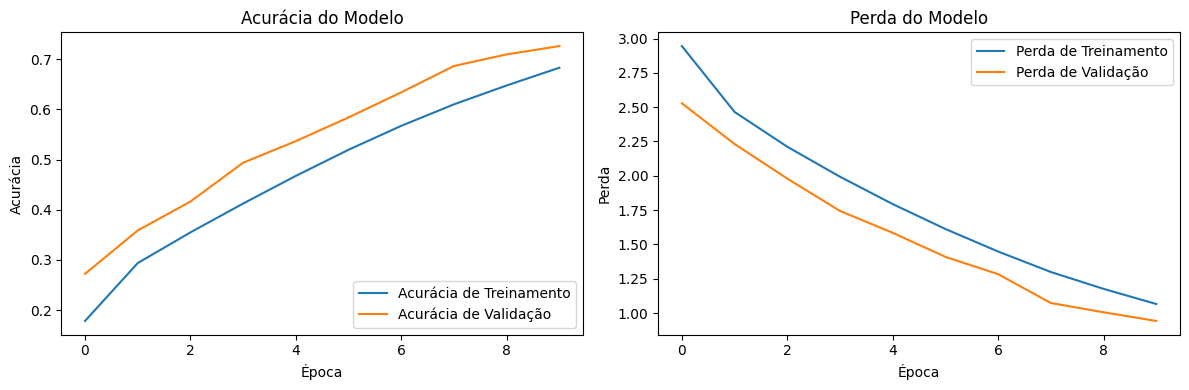

In [32]:
plot_history(history_time_domain)